<a href="https://colab.research.google.com/github/sagar0308/Ad-Click-Portfolio/blob/main/Ad_click.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
pip install category-encoders

     |████████████████████████████████| 80 kB 5.1 MB/s 


In [3]:

# Importing necessary liabraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


import time
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.cluster import KMeans


from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import pickle

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/ML_Projects/Ad_click/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/ML_Projects/Ad_click/test.csv')

In [5]:
df1 =  df.copy()

In [6]:
df.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
0,IDsrk7SoW,2017-01-14 09:42:09,4709696.0,887235,17714,20301556,e,Firefox,NaN,0
1,IDmMSxHur,2017-01-18 17:50:53,5189467.0,178235,21407,9434818,b,Mozilla Firefox,Desktop,0
2,IDVLNN0Ut,2017-01-11 12:46:49,98480.0,518539,25085,2050923,a,Edge,NaN,0
3,ID32T6wwQ,2017-01-17 10:18:43,8896401.0,390352,40339,72089744,c,Firefox,Mobile,0
4,IDqUShzMg,2017-01-14 16:02:33,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0


In [7]:
df.tail()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
12137805,IDeCjSZFQ,2017-01-16 14:43:18,9219361.0,636017,82877,26120440,a,Google Chrome,Mobile,0
12137806,IDE4u9Brn,2017-01-13 11:59:51,8720884.0,917105,84987,76367582,a,Firefox,Mobile,0
12137807,IDJpAwqL6,2017-01-12 11:23:33,6908273.0,302637,34670,41475976,b,Firefox,Mobile,0
12137808,IDNEm9J6j,2017-01-14 08:21:19,8075597.0,382869,40339,43452411,e,Edge,Tablet,0
12137809,IDoKP7vI6,2017-01-11 13:51:26,NaN,879032,92704,95441506,c,Google Chrome,Mobile,0


In [8]:
df.shape

(12137810, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12137810 entries, 0 to 12137809
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ID           object 
 1   datetime     object 
 2   siteid       float64
 3   offerid      int64  
 4   category     int64  
 5   merchant     int64  
 6   countrycode  object 
 7   browserid    object 
 8   devid        object 
 9   click        int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 926.0+ MB


In [10]:
# Dropping ID column as it doesn't serve any purpose
df.drop('ID', axis = 1, inplace = True)
df1.drop('ID', axis = 1, inplace = True)

In [11]:
df.head()

,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
0,2017-01-14 09:42:09,4709696.0,887235,17714,20301556,e,Firefox,NaN,0
1,2017-01-18 17:50:53,5189467.0,178235,21407,9434818,b,Mozilla Firefox,Desktop,0
2,2017-01-11 12:46:49,98480.0,518539,25085,2050923,a,Edge,NaN,0
3,2017-01-17 10:18:43,8896401.0,390352,40339,72089744,c,Firefox,Mobile,0
4,2017-01-14 16:02:33,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0


In [12]:
def data_information(df):
    
    ## Creating Empty Data Frame
    data_info = pd.DataFrame(np.random.randn(0, 11) * 0,
                             columns=['No. of Observations (Nrow)',
                                      'No. of Variables (Ncol)',
                                      'No. of Numeric Variables',
                                      'No. of Categorical Variables',
                                      'No. of Logical Variables',
                                      'No. of Date Variables',
                                      'No. of Zero variance Variables (Uniform)',
                                      '% of Variables having complete cases',
                                      '% of Variables having <=50% missing cases',
                                      '% of Variables having >50% missing cases',
                                      '% of Variables having >90% missing cases'])

    ## Data Inofrmation
    data_info.loc[0, 'No. of Observations (Nrow)'] = df.shape[0]
    data_info.loc[0, 'No. of Variables (Ncol)'] = df.shape[1]
    data_info.loc[0, 'No. of Numeric Variables'] = df._get_numeric_data().shape[1]
    data_info.loc[0, 'No. of Logical Variables'] = df.select_dtypes(include='bool').shape[1]
    data_info.loc[0, 'No. of Categorical Variables'] = df.select_dtypes(include='object').shape[1]
    data_info.loc[0, 'No. of Date Variables'] = df.select_dtypes(include='datetime64').shape[1]
    data_info.loc[0, 'No. of Zero variance Variables (Uniform)'] = df.loc[:, df.apply(pd.Series.nunique) == 1].shape[1]

    null_per = pd.DataFrame(df.isnull().sum()/df.shape[0])
    null_per.columns = ['null_per']

    data_info.loc[0, '% of Variables having complete cases'] = null_per[null_per.null_per == 0].shape[0] * 100 / \
                                                               df.shape[1]
    data_info.loc[0, '% of Variables having <=50% missing cases'] = null_per[null_per.null_per <= 0.50].shape[0] * 100 / \
                                                                    df.shape[1]
    data_info.loc[0, '% of Variables having >50% missing cases'] = null_per[null_per.null_per > 0.50].shape[0] * 100 / \
                                                                   df.shape[1]
    data_info.loc[0, '% of Variables having >90% missing cases'] = null_per[null_per.null_per > 0.90].shape[0] * 100 / \
                                                                   df.shape[1]

    ## Transposing Data to get in consumable format
    data_info = data_info.transpose()
    data_info.columns = ['Value']
    data_info['Value'] = data_info['Value'].astype(int)

    return data_info

In [13]:
data_information(df)

,Value
No. of Observations (Nrow),12137810
No. of Variables (Ncol),9
No. of Numeric Variables,5
No. of Categorical Variables,4
No. of Logical Variables,0
No. of Date Variables,0
No. of Zero variance Variables (Uniform),0
% of Variables having complete cases,66
% of Variables having <=50% missing cases,100
% of Variables having >50% missing cases,0


In [14]:
def cat_count_summary(df):

    df_cat = df.select_dtypes(['object', 'bool'])

    data_info_cat = pd.DataFrame()
    ## Counts Stats on Categorical Variable
    try:  ## incase Categorical variables not present
        for c in df_cat.columns:
            data_info_cat.loc[c, 'Unique Categories'] = len(df_cat[c].unique())
            data_info_cat.loc[c, 'Missing Percentage'] = (df_cat[df_cat[c].isnull()].shape[0]*100) / df_cat.shape[0]
    except:
        pass
    return data_info_cat

In [15]:
cat_count_summary(df)

,Unique Categories,Missing Percentage
datetime,515116.0,0.000000
countrycode,6.0,0.000000
browserid,12.0,5.011835
devid,4.0,14.996931


# Lets begin with some EDA!


In [16]:
df.click.value_counts()

0    11700596
1      437214
Name: click, dtype: int64

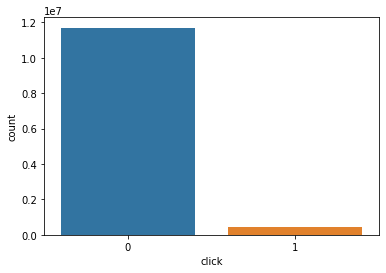

In [17]:
sns.countplot(x='click', data=df)

### It seems to be Dataset is heavily imbalanced!


In [18]:
df[df.click==0]

,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
0,2017-01-14 09:42:09,4709696.0,887235,17714,20301556,e,Firefox,NaN,0
1,2017-01-18 17:50:53,5189467.0,178235,21407,9434818,b,Mozilla Firefox,Desktop,0
2,2017-01-11 12:46:49,98480.0,518539,25085,2050923,a,Edge,NaN,0
3,2017-01-17 10:18:43,8896401.0,390352,40339,72089744,c,Firefox,Mobile,0
4,2017-01-14 16:02:33,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0
...,...,...,...,...,...,...,...,...,...
12137805,2017-01-16 14:43:18,9219361.0,636017,82877,26120440,a,Google Chrome,Mobile,0
12137806,2017-01-13 11:59:51,8720884.0,917105,84987,76367582,a,Firefox,Mobile,0
12137807,2017-01-12 11:23:33,6908273.0,302637,34670,41475976,b,Firefox,Mobile,0
12137808,2017-01-14 08:21:19,8075597.0,382869,40339,43452411,e,Edge,Tablet,0


In [19]:
df_0 = df[df.click==0]

In [20]:
 #Getting indices of majority class having any value missing so that we can remove them.

total = df_0.isnull().sum(axis=1).sort_values(ascending=False)
percent = (df_0.isnull().sum(axis=1)/df_0.isnull().count(axis=1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total_missing_values_per_row', 'Percent'])
index = missing_data[missing_data.Percent > 0].index

In [21]:
df_1 = df[df.click==1]  

In [22]:
total2 = df_1.isnull().sum(axis=1).sort_values(ascending=False)
percent2 = (df_1.isnull().sum(axis=1)/df_1.isnull().count(axis=1)).sort_values(ascending=False)
missing_data2 = pd.concat([total2, percent2], axis=1, keys=['Total_missing_values_per_row2', 'Percent2'])
missing_data2[missing_data2.Percent2 > 0].index

Int64Index([ 5428908,  4031984,  5403458,  6304301,  8140332, 11199787,
             6092089, 11704473, 10136057,  4004474,
            ...
             1070587, 12003219, 11013552, 11013544,   672004,   671895,
            11559893, 11557898,  1551526,   680378],
           dtype='int64', length=119714)

First, we'll remove rows with click = 0 having any Nan values. We were able to remove 3,196,483 rows by this method.

In [23]:
df.drop(index,inplace=True)

In [24]:
df.shape

(8941327, 9)

Now we are left with 8,941,327 datapoints. Lets check if its balanced or not.

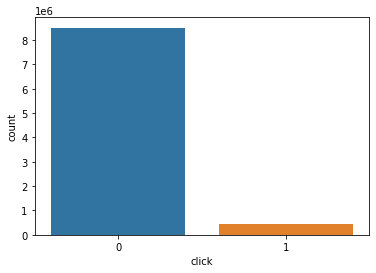

In [25]:
sns.countplot(x='click', data=df) 

Alas! It still is an imbalanced dataset!


### Finding realtion between browserid and devid for missing data imputation.


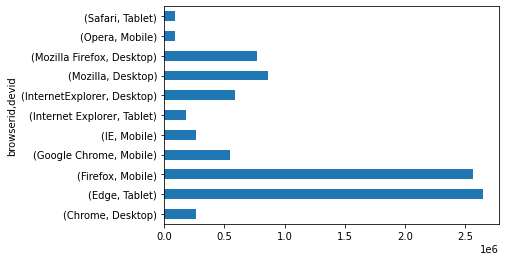

In [26]:
df.groupby(['browserid', 'devid']).click.count().plot(kind='barh')

In [27]:
crosstab = pd.crosstab(index=df["browserid"], columns=df["devid"])
crosstab

devid,Desktop,Mobile,Tablet
browserid,,,
Chrome,265174,0,0
Edge,0,0,2645881
Firefox,0,2562152,0
Google Chrome,0,548883,0
IE,0,265416,0
Internet Explorer,0,0,177645
InternetExplorer,584550,0,0
Mozilla,858914,0,0
Mozilla Firefox,771238,0,0


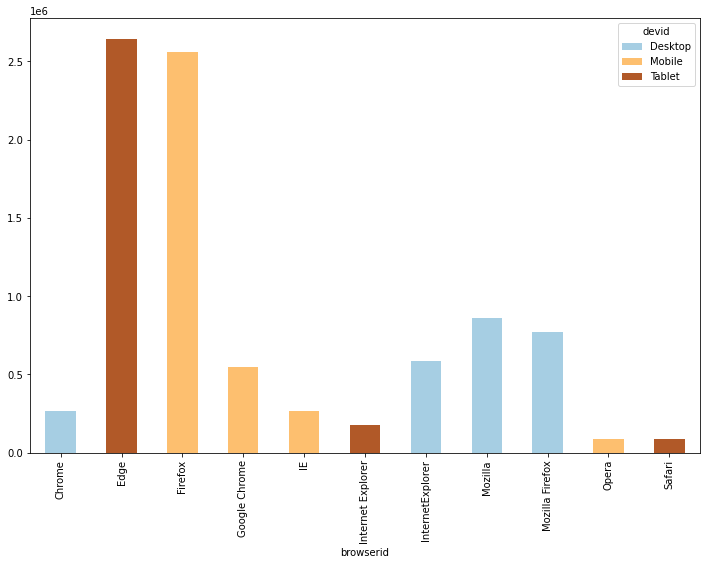

In [28]:
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

Yay! Clearly, dev id depends on browserid. We would impute devid based on browserid.


In [29]:
df.nunique().sort_values()

click               2
devid               3
countrycode         6
browserid          11
category          271
merchant          697
siteid         219014
datetime       513374
offerid        809977
dtype: int64

In [30]:
ones = int(len(df[df['click'] == 1])*1.5)

zeros = df[df.click == 0].index

random_indices = np.random.choice(zeros,ones,replace=False)

one_indices = df[df.click == 1].index

under_sample_indices = np.concatenate([one_indices,random_indices])

under_sample = df.loc[under_sample_indices]

df = under_sample

In [31]:
df

,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
13,2017-01-15 21:43:34,6718234.0,433512,43612,57517812,c,NaN,Desktop,1
16,2017-01-10 15:28:24,469603.0,385750,93286,7122654,a,Google Chrome,Mobile,1
35,2017-01-14 19:01:18,5369414.0,513860,27655,92826840,f,Google Chrome,Mobile,1
67,2017-01-11 19:21:58,6005717.0,956737,1678,60293830,f,InternetExplorer,Desktop,1
90,2017-01-16 14:29:36,7979331.0,501647,68947,58321067,f,Mozilla,Desktop,1
...,...,...,...,...,...,...,...,...,...
8813846,2017-01-19 10:33:22,1742689.0,389662,12211,58163546,a,Google Chrome,Mobile,0
9006132,2017-01-15 10:20:54,8789105.0,60899,904,26391770,b,Firefox,Mobile,0
4091313,2017-01-17 09:09:14,7225960.0,890371,42227,32738053,a,Firefox,Mobile,0
254016,2017-01-10 12:11:24,6673472.0,224559,41706,4000296,b,Mozilla Firefox,Desktop,0


Lets have a look at the undersampled data distribution.


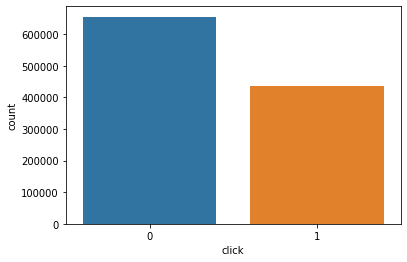

In [32]:
sns.countplot(x='click', data=df)

Nice! This distribution now seems good. Lets analyse whether we were able to retain most of categories.


In [33]:
# Unique categories left in each column after undersampling.
df.nunique().sort_values()

click               2
devid               3
countrycode         6
browserid          11
category          271
merchant          697
siteid         210508
offerid        384863
datetime       435386
dtype: int64

# Filling out missing values


In [34]:
df.isnull().sum()

datetime           0
siteid         43507
offerid            0
category           0
merchant           0
countrycode        0
browserid      21714
devid          66033
click              0
dtype: int64

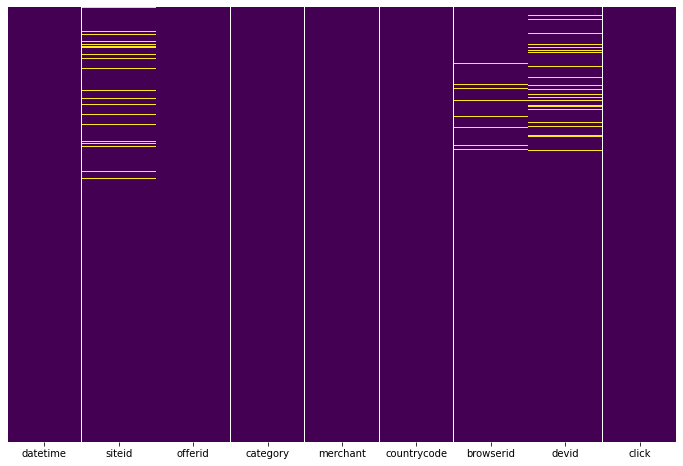

In [35]:


plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [36]:
df.head()

,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
13,2017-01-15 21:43:34,6718234.0,433512,43612,57517812,c,NaN,Desktop,1
16,2017-01-10 15:28:24,469603.0,385750,93286,7122654,a,Google Chrome,Mobile,1
35,2017-01-14 19:01:18,5369414.0,513860,27655,92826840,f,Google Chrome,Mobile,1
67,2017-01-11 19:21:58,6005717.0,956737,1678,60293830,f,InternetExplorer,Desktop,1
90,2017-01-16 14:29:36,7979331.0,501647,68947,58321067,f,Mozilla,Desktop,1


In [37]:
crosstab = pd.crosstab(index=df["countrycode"], columns=df["browserid"])
crosstab

browserid,Chrome,Edge,Firefox,Google Chrome,IE,Internet Explorer,InternetExplorer,Mozilla,Mozilla Firefox,Opera,Safari
countrycode,,,,,,,,,,,
a,5618,51218,49922,15375,5504,3614,17413,16821,15172,1809,1846
b,9622,92313,89038,21915,9413,6392,24195,29906,27116,3125,3147
c,7253,14390,18046,74131,7267,4834,95107,7313,7160,2405,2466
d,4772,12533,14762,45398,4734,3063,57916,5773,5432,1517,1535
e,2617,20770,20154,10709,2489,1793,12828,7019,6367,897,810
f,2638,20888,20528,10482,2653,1768,12577,7020,6197,896,920


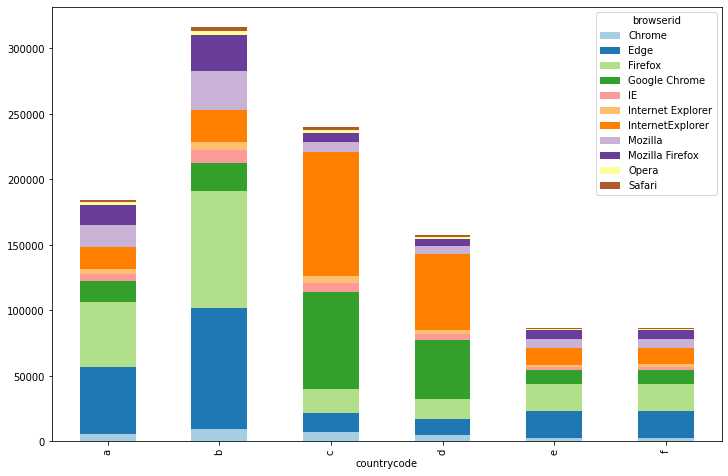

In [38]:
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

## 1. First for browserid
Browserid is to be filled based on country. 
Lets check missing browser values countrywise.

In [39]:
print("For country A:",df[df.countrycode=='a']['browserid'].isnull().sum())
print("For country B:",df[df.countrycode=='b']['browserid'].isnull().sum())
print("For country C:",df[df.countrycode=='c']['browserid'].isnull().sum())
print("For country D:",df[df.countrycode=='d']['browserid'].isnull().sum())
print("For country E:",df[df.countrycode=='e']['browserid'].isnull().sum())
print("For country F:",df[df.countrycode=='f']['browserid'].isnull().sum())

For country A: 1088
For country B: 1048
For country C: 10778
For country D: 6645
For country E: 1089
For country F: 1066


Lets try to find the mode value of browser country-wise using plots.


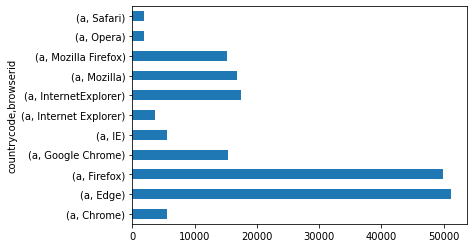

In [40]:
df[df.countrycode=='a'].groupby(['countrycode','browserid']).click.count().plot(kind='barh')

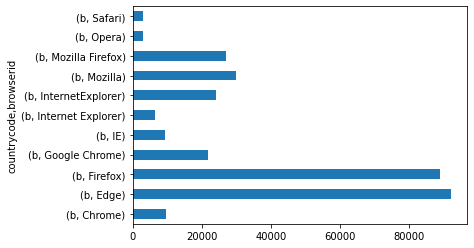

In [41]:
df[df.countrycode=='b'].groupby(['countrycode','browserid']).click.count().plot(kind='barh')

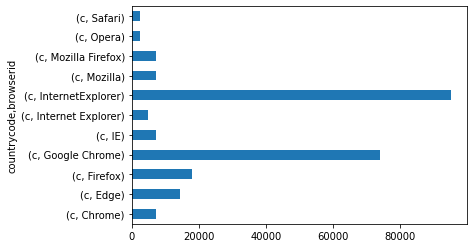

In [42]:
df[df.countrycode=='c'].groupby(['countrycode','browserid']).click.count().plot(kind='barh')

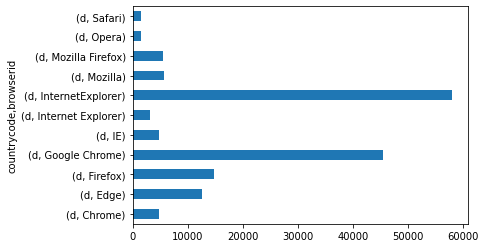

In [43]:
df[df.countrycode=='d'].groupby(['countrycode','browserid']).click.count().plot(kind='barh')

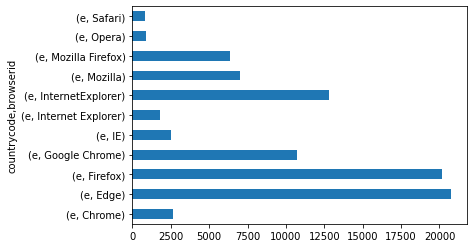

In [44]:
df[df.countrycode=='e'].groupby(['countrycode','browserid']).click.count().plot(kind='barh')

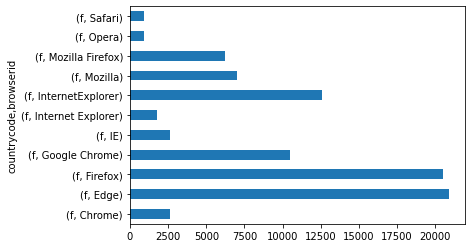

In [45]:
df[df.countrycode=='f'].groupby(['countrycode','browserid']).click.count().plot(kind='barh')

Imputing missing vlaues for browserid


In [46]:
df.loc[(df['countrycode']=='a') & (df['browserid'].isnull()) ,'browserid']='Edge'
df.loc[(df['countrycode']=='b') & (df['browserid'].isnull()) ,'browserid']='Edge'
df.loc[(df['countrycode']=='c') & (df['browserid'].isnull()) ,'browserid']='InternetExplorer'
df.loc[(df['countrycode']=='d') & (df['browserid'].isnull()) ,'browserid']='InternetExplorer'
df.loc[(df['countrycode']=='e') & (df['browserid'].isnull()) ,'browserid']='Edge'
df.loc[(df['countrycode']=='f') & (df['browserid'].isnull()) ,'browserid']='InternetExplorer'

In [47]:
df.browserid.isnull().sum()

0

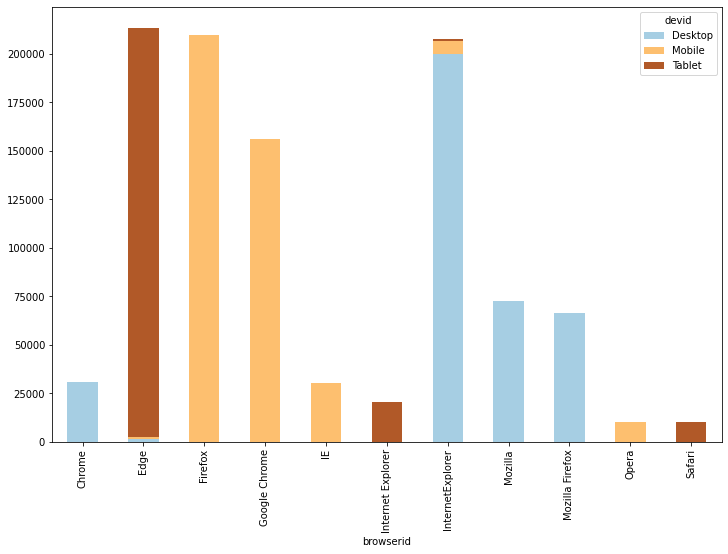

In [48]:
crosstab = pd.crosstab(index=df["browserid"], columns=df["devid"])
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [49]:
df.loc[((df['browserid']=='Safari')|(df['browserid']=='Edge')|(df['browserid']=='Internet Explorer')) & (df['devid'].isnull()) ,'devid']='Tablet'
df.loc[((df['browserid']=='Opera')|(df['browserid']=='IE')|(df['browserid']=='Firefox')|(df['browserid']=='Google Chrome')) & (df['devid'].isnull()) ,'devid']='Mobile'
df.loc[((df['browserid']=='InternetExplorer')|(df['browserid']=='Mozilla')|(df['browserid']=='Mozilla Firefox')|(df['browserid']=='Chrome')) & (df['devid'].isnull()) ,'devid']='Desktop'

In [50]:
df['devid'].isnull().sum()

0

Feature Engineering : Extracting time information from datetime column.

In [51]:
df['new_time'] = [d.split(' ')[1] for d in df['datetime']]

In [52]:
df.head()

,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click,new_time
13,2017-01-15 21:43:34,6718234.0,433512,43612,57517812,c,InternetExplorer,Desktop,1,21:43:34
16,2017-01-10 15:28:24,469603.0,385750,93286,7122654,a,Google Chrome,Mobile,1,15:28:24
35,2017-01-14 19:01:18,5369414.0,513860,27655,92826840,f,Google Chrome,Mobile,1,19:01:18
67,2017-01-11 19:21:58,6005717.0,956737,1678,60293830,f,InternetExplorer,Desktop,1,19:21:58
90,2017-01-16 14:29:36,7979331.0,501647,68947,58321067,f,Mozilla,Desktop,1,14:29:36


In [53]:
def convertTimeToQuarter(time):
    str_time = str(time)
    hour = str_time.split(':')[0]
    quarter = ''
    if int(hour) < 6:
        quarter = 'phase1'
    elif int(hour) < 12: 
        quarter = 'phase2'
    elif int(hour) < 18: 
        quarter = 'phase3'
    else:
        quarter = 'phase4'
    return quarter

In [54]:
df['time_phase'] = [convertTimeToQuarter(d) for d in df['new_time']]

In [55]:
df.loc[:,['datetime','new_time','time_phase']]

,datetime,new_time,time_phase
13,2017-01-15 21:43:34,21:43:34,phase4
16,2017-01-10 15:28:24,15:28:24,phase3
35,2017-01-14 19:01:18,19:01:18,phase4
67,2017-01-11 19:21:58,19:21:58,phase4
90,2017-01-16 14:29:36,14:29:36,phase3
...,...,...,...
8813846,2017-01-19 10:33:22,10:33:22,phase2
9006132,2017-01-15 10:20:54,10:20:54,phase2
4091313,2017-01-17 09:09:14,09:09:14,phase2
254016,2017-01-10 12:11:24,12:11:24,phase3


In [56]:
df.drop(['datetime','new_time'], axis=1, inplace= True)

In [57]:
df.head()

,siteid,offerid,category,merchant,countrycode,browserid,devid,click,time_phase
13,6718234.0,433512,43612,57517812,c,InternetExplorer,Desktop,1,phase4
16,469603.0,385750,93286,7122654,a,Google Chrome,Mobile,1,phase3
35,5369414.0,513860,27655,92826840,f,Google Chrome,Mobile,1,phase4
67,6005717.0,956737,1678,60293830,f,InternetExplorer,Desktop,1,phase4
90,7979331.0,501647,68947,58321067,f,Mozilla,Desktop,1,phase3


Lastly, forward filling for missing siteid.


In [58]:
df.siteid.fillna(method='ffill', inplace=True)

In [59]:
df.isnull().sum()

siteid         0
offerid        0
category       0
merchant       0
countrycode    0
browserid      0
devid          0
click          0
time_phase     0
dtype: int64

Lets have a look at the different browsers present in the data. Clearly, we can merge some of them together.

In [60]:
df.browserid.value_counts()

InternetExplorer     238525
Edge                 215337
Firefox              212450
Google Chrome        178010
Mozilla               73852
Mozilla Firefox       67444
Chrome                32520
IE                    32060
Internet Explorer     21464
Safari                10724
Opera                 10649
Name: browserid, dtype: int64

Clubbing similar browsers together.

In [61]:
#df = df.replace({'a':{1:11, 2:22}})

replace_IE = {"InternetExplorer" : "IE", "Internet Explorer" : "IE"}
df=df.replace({'browserid' : replace_IE})

replace_browser = {"Mozilla Firefox" : "Firefox", "Mozilla" : "Firefox"}
df=df.replace({'browserid' : replace_browser})

df['browserid']=df.browserid.str.replace("Google Chrome","Chrome")

In [62]:
df.browserid.unique()

array(['IE', 'Chrome', 'Firefox', 'Safari', 'Edge', 'Opera'], dtype=object)

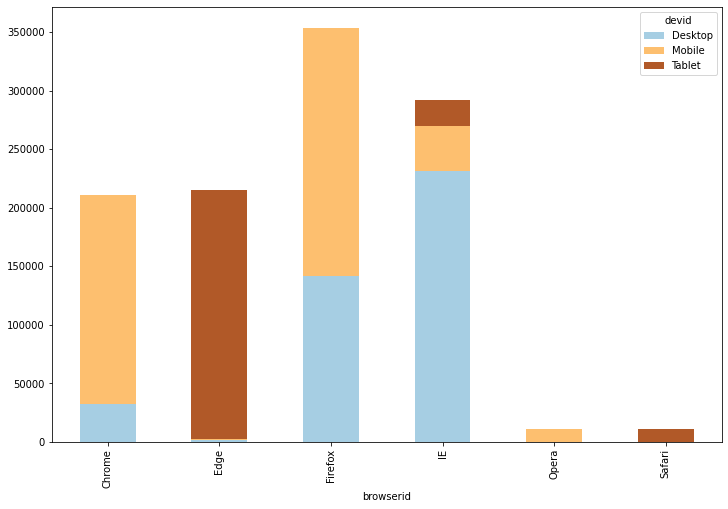

In [63]:
crosstab = pd.crosstab(index=df["browserid"], columns=df["devid"])
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

Mean Encoding of features

In [64]:
time_phase = pd.crosstab(index=df["time_phase"], columns=df["click"])
time_phase['ME']=time_phase[1]/(time_phase[1]+time_phase[0])
time_phase.drop([0,1], axis = 1, inplace = True)
time_phase = pd.Series(time_phase.ME)
df['time_phase'] = df['time_phase'].map(time_phase)


browserid = pd.crosstab(index=df["browserid"], columns=df["click"])
browserid['ME']=browserid[1]/(browserid[1]+browserid[0])
browserid.drop([0,1],axis = 1, inplace = True)
browserid = pd.Series(browserid.ME)
df['browserid'] = df['browserid'].map(browserid)


devid = pd.crosstab(index=df["devid"], columns=df["click"])
devid['ME']=devid[1]/(devid[1]+devid[0])
devid.drop([0,1],axis = 1, inplace = True)
devid = pd.Series(devid.ME)
df['devid'] = df['devid'].map(devid)
df.head()


countrycode = pd.crosstab(index=df["countrycode"], columns=df["click"])
countrycode['ME']=countrycode[1]/(countrycode[1]+countrycode[0])
countrycode.drop([0,1],axis = 1, inplace = True)
countrycode = pd.Series(countrycode.ME)
df['countrycode'] = df['countrycode'].map(countrycode)
df.head()


siteid = pd.crosstab(index=df["siteid"], columns=df["click"])
siteid['ME']=siteid[1]/(siteid[1]+siteid[0])
siteid.drop([0,1],axis = 1, inplace = True)
siteid = pd.Series(siteid.ME)
df['siteid'] = df['siteid'].map(siteid)


category = pd.crosstab(index=df["category"], columns=df["click"])
category['ME']=category[1]/(category[1]+category[0])
category.drop([0,1],axis = 1, inplace = True)
category = pd.Series(category.ME)
df['category'] = df['category'].map(category)


merchant = pd.crosstab(index=df["merchant"], columns=df["click"])
merchant['ME']=merchant[1]/(merchant[1]+merchant[0])
merchant.drop([0,1],axis = 1, inplace = True)
merchant = pd.Series(merchant.ME)
df['merchant'] = df['merchant'].map(merchant)

offerid = pd.crosstab(index=df["offerid"], columns=df["click"])
offerid['ME']=offerid[1]/(offerid[1]+offerid[0])
offerid.drop([0,1],axis = 1, inplace = True)
offerid = pd.Series(offerid.ME)
df['offerid'] = df['offerid'].map(offerid)

df.head()

,siteid,offerid,category,merchant,countrycode,browserid,devid,click,time_phase
13,1.0,0.333333,0.465265,0.631954,0.869138,0.774867,0.562400,1,0.743173
16,0.4,1.000000,0.333870,0.446003,0.116532,0.749850,0.422688,1,0.312080
35,1.0,1.000000,0.268235,0.626415,0.249769,0.749850,0.422688,1,0.743173
67,1.0,0.400000,0.453318,0.543046,0.249769,0.774867,0.562400,1,0.743173
90,1.0,1.000000,0.302103,0.289485,0.249769,0.093242,0.562400,1,0.312080


In [65]:
feature_cols = ['siteid', 'offerid', 'category', 'merchant','countrycode','browserid','devid', 'time_phase']
x = df[feature_cols]
y = df.click

## Createing models for train data.


In [66]:
random_state = 11
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state= random_state)

In [67]:
'''Build pipline of classifiers'''
# set all CPU
n_jobs = -1

# LogisticRegression
pipe_lr = Pipeline([('lr', LogisticRegression(random_state=random_state, n_jobs=n_jobs, max_iter=500))])

# RandomForestClassifier
pipe_rf = Pipeline([('rf', RandomForestClassifier(random_state=random_state, oob_score=True, n_jobs=n_jobs))])

# DecisionTreeClassifier
pipe_dt = Pipeline([('dt', DecisionTreeClassifier(random_state=random_state, max_features='auto'))])

# BaggingClassifier
# note we use SGDClassifier as classier inside BaggingClassifier
pipe_bag = Pipeline([('bag',BaggingClassifier(base_estimator=SGDClassifier(random_state=random_state, n_jobs=n_jobs, max_iter=1500),\
                                              random_state=random_state,oob_score=True,n_jobs=n_jobs))])

In [68]:
'''Set parameters for Random Search '''
# set number 
cv = StratifiedKFold(shuffle=True, n_splits=3, random_state=random_state)
# set for LogisticRegression
random_params_lr = [{
                'lr__penalty': ['l1','l2'],
                'lr__C': [1,0.1,0.01,0.001],
                'lr__solver': ['sag']
                }]
                
# set for RandomForestClassifier
random_params_rf = [{
                'rf__criterion': ['entropy','gini'],
                'rf__min_samples_leaf': [80, 100],
                'rf__max_depth': [25, 27],
                'rf__min_samples_split': [3, 5],
                'rf__n_estimators' : [60, 70]
                }]

# set for DecisionTreeClassifier
random_params_dt = [{
                'dt__max_depth': [8, 10],
                'dt__min_samples_leaf': [1, 3, 5, 7]
                  }]
# set for BaggingClassifier
random_params_bag = [{'bag__n_estimators': [10, 15, 20]}]


In [69]:
'''Random search objects'''
# for LogisticRegression
rs_lr = RandomizedSearchCV(pipe_lr, param_distributions=random_params_lr,
                     scoring='roc_auc', cv=cv) 
# for RandomForestClassifier
rs_rf = RandomizedSearchCV(pipe_rf, param_distributions=random_params_rf,
                     scoring='roc_auc', cv=cv)
# for DecisionTreeClassifier
rs_dt = RandomizedSearchCV(pipe_dt, param_distributions=random_params_dt,
                     scoring='roc_auc', cv=cv)
# for BaggingClassifier
rs_bag = RandomizedSearchCV(pipe_bag, param_distributions=random_params_bag,
                     scoring='roc_auc', cv=cv)

In [70]:
# models that we iterate over
look_for = [rs_lr, rs_rf, rs_dt, rs_bag]
# dict for later use 
model_dict = {0:'Logistic_reg', 1:'RandomForest', 2:'DesionTree', 3:'Bagging with SGDClassifier'}

In [71]:
''' Function to iterate over models and obtain results'''
# set empty dicts and list
result_acc = {}
result_auc = {}
models = []

for index, model in enumerate(look_for):
        start = time.time()
        print()
        print('+++++++ Start New Model ++++++++++++++++++++++')
        print('Estimator is {}'.format(model_dict[index]))
        model.fit(X_train, y_train)
        print('---------------------------------------------')

        print('best params {}'.format(model.best_params_))
        print('best score is {}'.format(model.best_score_))
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
        print('---------------------------------------------')
        print('ROC_AUC is {}'.format(auc))
        
        end = time.time()
        print('It lasted for {} sec'.format(round(end - start, 3)))
        print('++++++++ End Model +++++++++++++++++++++++++++')
        print()
        print()
        models.append(model.best_estimator_)
        result_acc[index] = model.best_score_
        result_auc[index] = auc


+++++++ Start New Model ++++++++++++++++++++++
Estimator is Logistic_reg
---------------------------------------------
best params {'lr__solver': 'sag', 'lr__penalty': 'l2', 'lr__C': 1}
best score is 0.9974181615532812
---------------------------------------------
ROC_AUC is 0.9974445651286435
It lasted for 89.446 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is RandomForest
---------------------------------------------
best params {'rf__n_estimators': 70, 'rf__min_samples_split': 3, 'rf__min_samples_leaf': 100, 'rf__max_depth': 25, 'rf__criterion': 'entropy'}
best score is 0.9982266671912838
---------------------------------------------
ROC_AUC is 0.9982458498812485
It lasted for 1750.963 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is DesionTree
---------------------------------------------
best params {'dt__min_samples_leaf': 7, 'dt__max_depth': 10}
bes

## Creating best model with best parameters 

In [72]:
#final model for cluster 0 using RF with best params 
ns_probs = [0 for _ in range(len(y_test))]   #generate a no skill prediction (majority class)

final_rf = RandomForestClassifier(n_estimators= 70, min_samples_split= 3, min_samples_leaf= 80, max_depth= 25, criterion= 'entropy',random_state = 11)
final_rf.fit(X_train,y_train) 

rf_probs = final_rf.predict_proba(X_test)  #predict probabilities
rf_probs = rf_probs[:, 1]                    #keep probabilities for the positive outcome only
#calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)     
rf_auc = roc_auc_score(y_test, rf_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RandomForest: ROC AUC=%.3f' % (rf_auc))

No Skill: ROC AUC=0.500
RandomForest: ROC AUC=0.998


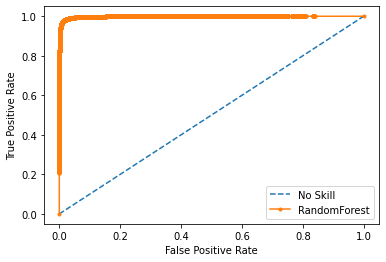

In [73]:
#calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
#plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='RandomForest')
#axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
#show the legend
pyplot.legend()
#show the plot
pyplot.show()

# Now let's work on test data

In [74]:
df2 = test.copy()

In [75]:
df2.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid
0,IDFDJVI,2017-01-22 09:55:48,755610.0,808980,17714,26391770,b,Mozilla Firefox,Desktop
1,IDNWkTQ,2017-01-22 03:54:39,3714899.0,280355,12052,39507200,b,Edge,Tablet
2,ID9pRmM,2017-01-21 10:25:50,4378333.0,930819,30580,46148550,e,Mozilla Firefox,NaN
3,IDHaQaj,2017-01-22 14:45:53,1754730.0,612234,11837,8837581,b,Edge,Tablet
4,IDT2CrF,2017-01-22 09:34:07,5299909.0,524289,45620,31388981,b,Mozilla,NaN


In [76]:
df2.tail()  

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid
3706902,IDboA6b,2017-01-21 13:16:15,8119016.0,476777,92704,87903766,e,Google Chrome,NaN
3706903,IDpHDPM,2017-01-22 13:20:16,9792509.0,978629,74711,31463671,c,Mozilla,NaN
3706904,IDAISNl,2017-01-22 08:06:07,2627839.0,218588,29183,42914671,f,Mozilla Firefox,Desktop
3706905,ID3k389,2017-01-21 13:04:13,5174731.0,682278,36610,74868704,b,Firefox,Mobile
3706906,IDjioLR,2017-01-22 15:34:43,9339358.0,170847,33287,47079934,d,Edge,Tablet


In [77]:
df2.shape

(3706907, 9)

In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706907 entries, 0 to 3706906
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ID           object 
 1   datetime     object 
 2   siteid       float64
 3   offerid      int64  
 4   category     int64  
 5   merchant     int64  
 6   countrycode  object 
 7   browserid    object 
 8   devid        object 
dtypes: float64(1), int64(3), object(5)
memory usage: 254.5+ MB


In [79]:
test.drop('ID', axis = 1, inplace = True)
df2.drop('ID', axis = 1, inplace = True)

In [80]:
df2.head()

,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid
0,2017-01-22 09:55:48,755610.0,808980,17714,26391770,b,Mozilla Firefox,Desktop
1,2017-01-22 03:54:39,3714899.0,280355,12052,39507200,b,Edge,Tablet
2,2017-01-21 10:25:50,4378333.0,930819,30580,46148550,e,Mozilla Firefox,NaN
3,2017-01-22 14:45:53,1754730.0,612234,11837,8837581,b,Edge,Tablet
4,2017-01-22 09:34:07,5299909.0,524289,45620,31388981,b,Mozilla,NaN


In [81]:
def data_information(df):
    
    ## Creating Empty Data Frame
    data_info = pd.DataFrame(np.random.randn(0, 11) * 0,
                             columns=['No. of Observations (Nrow)',
                                      'No. of Variables (Ncol)',
                                      'No. of Numeric Variables',
                                      'No. of Categorical Variables',
                                      'No. of Logical Variables',
                                      'No. of Date Variables',
                                      'No. of Zero variance Variables (Uniform)',
                                      '% of Variables having complete cases',
                                      '% of Variables having <=50% missing cases',
                                      '% of Variables having >50% missing cases',
                                      '% of Variables having >90% missing cases'])

    ## Data Inofrmation
    data_info.loc[0, 'No. of Observations (Nrow)'] = df.shape[0]
    data_info.loc[0, 'No. of Variables (Ncol)'] = df.shape[1]
    data_info.loc[0, 'No. of Numeric Variables'] = df._get_numeric_data().shape[1]
    data_info.loc[0, 'No. of Logical Variables'] = df.select_dtypes(include='bool').shape[1]
    data_info.loc[0, 'No. of Categorical Variables'] = df.select_dtypes(include='object').shape[1]
    data_info.loc[0, 'No. of Date Variables'] = df.select_dtypes(include='datetime64').shape[1]
    data_info.loc[0, 'No. of Zero variance Variables (Uniform)'] = df.loc[:, df.apply(pd.Series.nunique) == 1].shape[1]

    null_per = pd.DataFrame(df.isnull().sum()/df.shape[0])
    null_per.columns = ['null_per']

    data_info.loc[0, '% of Variables having complete cases'] = null_per[null_per.null_per == 0].shape[0] * 100 / \
                                                               df.shape[1]
    data_info.loc[0, '% of Variables having <=50% missing cases'] = null_per[null_per.null_per <= 0.50].shape[0] * 100 / \
                                                                    df.shape[1]
    data_info.loc[0, '% of Variables having >50% missing cases'] = null_per[null_per.null_per > 0.50].shape[0] * 100 / \
                                                                   df.shape[1]
    data_info.loc[0, '% of Variables having >90% missing cases'] = null_per[null_per.null_per > 0.90].shape[0] * 100 / \
                                                                   df.shape[1]

    ## Transposing Data to get in consumable format
    data_info = data_info.transpose()
    data_info.columns = ['Value']
    data_info['Value'] = data_info['Value'].astype(int)

    return data_info

In [82]:
data_information(df2)

,Value
No. of Observations (Nrow),3706907
No. of Variables (Ncol),8
No. of Numeric Variables,4
No. of Categorical Variables,4
No. of Logical Variables,0
No. of Date Variables,0
No. of Zero variance Variables (Uniform),0
% of Variables having complete cases,62
% of Variables having <=50% missing cases,100
% of Variables having >50% missing cases,0


In [83]:
def cat_count_summary(df):

    df_cat = df.select_dtypes(['object', 'bool'])

    data_info_cat = pd.DataFrame()
    ## Counts Stats on Categorical Variable
    try:  ## incase Categorical variables not present
        for c in df_cat.columns:
            data_info_cat.loc[c, 'Unique Categories'] = len(df_cat[c].unique())
            data_info_cat.loc[c, 'Missing Percentage'] = (df_cat[df_cat[c].isnull()].shape[0]*100) / df_cat.shape[0]
    except:
        pass
    return data_info_cat

In [84]:
cat_count_summary(df2)

,Unique Categories,Missing Percentage
datetime,147548.0,0.000000
countrycode,6.0,0.000000
browserid,12.0,5.986285
devid,4.0,19.008273


In [85]:
df2.nunique().sort_values()

devid               3
countrycode         6
browserid          11
category          267
merchant          650
siteid          84892
datetime       147548
offerid        556519
dtype: int64

In [86]:
df2.isnull().sum()

datetime            0
siteid         370776
offerid             0
category            0
merchant            0
countrycode         0
browserid      221906
devid          704619
dtype: int64

In [87]:
crosstab = pd.crosstab(index=df2["countrycode"], columns=df2["browserid"])
crosstab

browserid,Chrome,Edge,Firefox,Google Chrome,IE,Internet Explorer,InternetExplorer,Mozilla,Mozilla Firefox,Opera,Safari
countrycode,,,,,,,,,,,
a,24570,250901,243828,44798,24485,16542,46119,81219,72758,8160,8442
b,43832,451398,437702,77333,43714,29442,78191,145763,131147,14713,14702
c,8551,52392,53865,52089,8576,5725,64970,18844,16869,2908,2895
d,7198,51407,51363,34447,7153,4733,42324,17545,16178,2381,2420
e,10084,100718,97579,20676,9964,6648,21793,32567,28961,3342,3301
f,10207,100219,96361,20595,10144,6755,21855,32563,29490,3360,3227


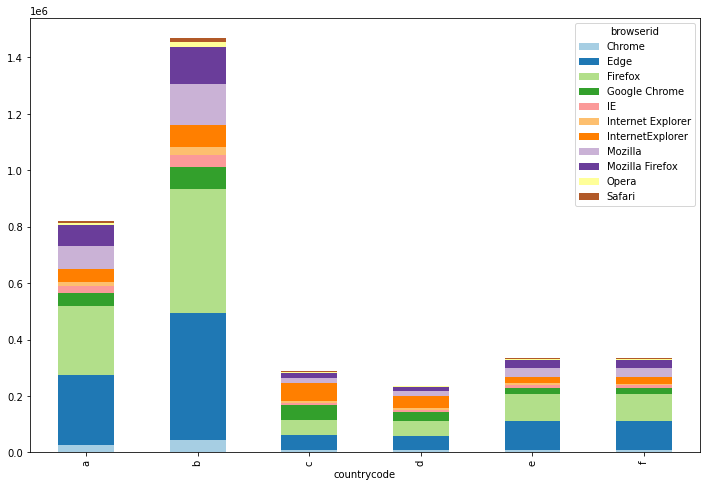

In [88]:
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [89]:
print("For country A:",df2[df2.countrycode=='a']['browserid'].isnull().sum())
print("For country B:",df2[df2.countrycode=='b']['browserid'].isnull().sum())
print("For country C:",df2[df2.countrycode=='c']['browserid'].isnull().sum())
print("For country D:",df2[df2.countrycode=='d']['browserid'].isnull().sum())
print("For country E:",df2[df2.countrycode=='e']['browserid'].isnull().sum())
print("For country F:",df2[df2.countrycode=='f']['browserid'].isnull().sum())

For country A: 52452
For country B: 93178
For country C: 18427
For country D: 15087
For country E: 21435
For country F: 21327


In [90]:
df2.loc[(df2['countrycode']=='a') & (df2['browserid'].isnull()) ,'browserid']='Edge'
df2.loc[(df2['countrycode']=='b') & (df2['browserid'].isnull()) ,'browserid']='Edge'
df2.loc[(df2['countrycode']=='c') & (df2['browserid'].isnull()) ,'browserid']='InternetExplorer'
df2.loc[(df2['countrycode']=='d') & (df2['browserid'].isnull()) ,'browserid']='InternetExplorer'
df2.loc[(df2['countrycode']=='e') & (df2['browserid'].isnull()) ,'browserid']='Edge'
df2.loc[(df2['countrycode']=='f') & (df2['browserid'].isnull()) ,'browserid']='InternetExplorer'

In [91]:
df2.browserid.isnull().sum()

0

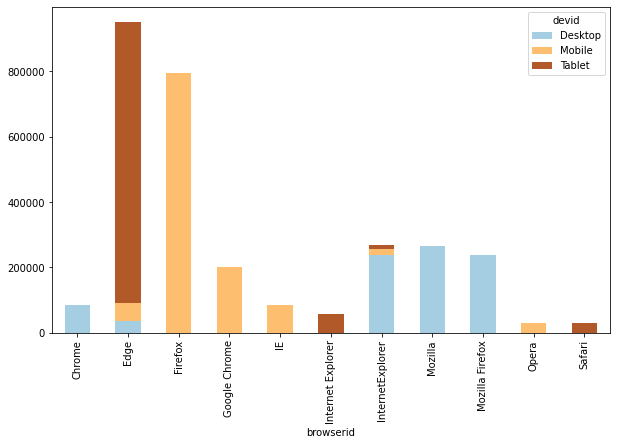

In [92]:
crosstab = pd.crosstab(index=df2["browserid"], columns=df2["devid"])
crosstab.plot(kind="bar", figsize=(10,6), stacked=True, colormap='Paired')

In [93]:
df2.loc[((df2['browserid']=='Safari')|(df2['browserid']=='Edge')|(df2['browserid']=='Internet Explorer')) & (df2['devid'].isnull()) ,'devid']='Tablet'
df2.loc[((df2['browserid']=='Opera')|(df2['browserid']=='IE')|(df2['browserid']=='Firefox')|(df2['browserid']=='Google Chrome')) & (df2['devid'].isnull()) ,'devid']='Mobile'
df2.loc[((df2['browserid']=='InternetExplorer')|(df2['browserid']=='Mozilla')|(df2['browserid']=='Mozilla Firefox')|(df2['browserid']=='Chrome')) & (df2['devid'].isnull()) ,'devid']='Desktop'

In [94]:
df2['devid'].isnull().sum()

0

In [95]:
df2['new_time'] = [d.split(' ')[1] for d in df2['datetime']]

In [96]:
def convertTimeToQuarter(time):
    str_time = str(time)
    hour = str_time.split(':')[0]
    quarter = ''
    if int(hour) < 6:
        quarter = 'phase1'
    elif int(hour) < 12: 
        quarter = 'phase2'
    elif int(hour) < 18: 
        quarter = 'phase3'
    else:
        quarter = 'phase4'
    return quarter

In [97]:
df2['time_phase'] = [convertTimeToQuarter(d) for d in df2['new_time']]

In [98]:
df2.loc[:,['datetime','new_time','time_phase']]

,datetime,new_time,time_phase
0,2017-01-22 09:55:48,09:55:48,phase2
1,2017-01-22 03:54:39,03:54:39,phase1
2,2017-01-21 10:25:50,10:25:50,phase2
3,2017-01-22 14:45:53,14:45:53,phase3
4,2017-01-22 09:34:07,09:34:07,phase2
...,...,...,...
3706902,2017-01-21 13:16:15,13:16:15,phase3
3706903,2017-01-22 13:20:16,13:20:16,phase3
3706904,2017-01-22 08:06:07,08:06:07,phase2
3706905,2017-01-21 13:04:13,13:04:13,phase3


In [99]:
df2.drop(['datetime','new_time'], axis=1, inplace= True)

In [100]:
df2.siteid.fillna(method='ffill', inplace=True)

In [101]:
df2.isnull().sum()

siteid         0
offerid        0
category       0
merchant       0
countrycode    0
browserid      0
devid          0
time_phase     0
dtype: int64

In [102]:
df2.browserid.value_counts()

Edge                 1174100
Firefox               980698
InternetExplorer      330093
Mozilla               328501
Mozilla Firefox       295403
Google Chrome         249938
Chrome                104442
IE                    104036
Internet Explorer      69845
Safari                 34987
Opera                  34864
Name: browserid, dtype: int64

In [103]:
replace_IE = {"InternetExplorer" : "IE", "Internet Explorer" : "IE"}
df2=df2.replace({'browserid' : replace_IE})

replace_browser = {"Mozilla Firefox" : "Firefox", "Mozilla" : "Firefox"}
df2=df2.replace({'browserid' : replace_browser})

df2['browserid']=df2.browserid.str.replace("Google Chrome","Chrome")

In [104]:
df2.browserid.unique()

array(['Firefox', 'Edge', 'Chrome', 'IE', 'Safari', 'Opera'], dtype=object)

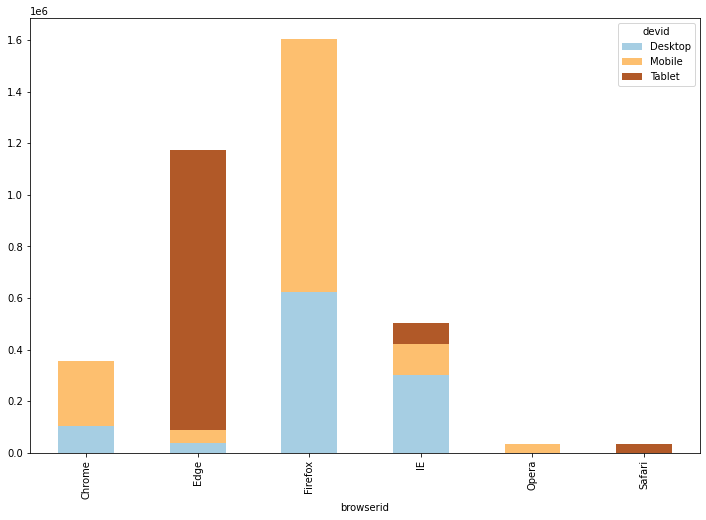

In [105]:
crosstab = pd.crosstab(index=df2["browserid"], columns=df2["devid"])
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [106]:
df2['time_phase'] = df2['time_phase'].map(time_phase)
df2['browserid'] = df2['browserid'].map(browserid)
df2['devid'] = df2['devid'].map(devid)
df2['countrycode'] = df2['countrycode'].map(countrycode)
df2['siteid'] = df2['siteid'].map(siteid)
df2['category'] = df2['category'].map(category)
df2['merchant'] = df2['merchant'].map(merchant)
df2['offerid'] = df2['offerid'].map(offerid)

df2.head()

,siteid,offerid,category,merchant,countrycode,browserid,devid,time_phase
0,0.444444,0.333333,0.315901,0.305422,0.068881,0.093242,0.562400,0.365396
1,0.000000,0.096774,0.489211,0.297060,0.068881,0.054329,0.090742,0.481189
2,NaN,NaN,0.351858,0.442971,0.252599,0.093242,0.562400,0.365396
3,0.000000,NaN,0.260653,0.236050,0.068881,0.054329,0.090742,0.312080
4,0.000000,NaN,0.473360,0.498852,0.068881,0.093242,0.562400,0.365396


In [107]:
df2.isnull().sum()

siteid         1549406
offerid         904062
category             0
merchant           587
countrycode          0
browserid            0
devid                0
time_phase           0
dtype: int64

In [108]:
df2.update(df2[['siteid','offerid','merchant']].fillna(0))
df2.head()

,siteid,offerid,category,merchant,countrycode,browserid,devid,time_phase
0,0.444444,0.333333,0.315901,0.305422,0.068881,0.093242,0.562400,0.365396
1,0.000000,0.096774,0.489211,0.297060,0.068881,0.054329,0.090742,0.481189
2,0.000000,0.000000,0.351858,0.442971,0.252599,0.093242,0.562400,0.365396
3,0.000000,0.000000,0.260653,0.236050,0.068881,0.054329,0.090742,0.312080
4,0.000000,0.000000,0.473360,0.498852,0.068881,0.093242,0.562400,0.365396


In [109]:
prediction = final_rf.predict(df2)